In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

##**Lendo a base de dados**

In [ ]:
df = pd.read_excel('satisfaction.xlsx')
df.head()

,Unnamed: 0,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,79794,110257,satisfied,Female,Loyal Customer,60,Business travel,Business,3453,5,5,5,5,5,4,5,3,3,3,3,3,3,3,3,0.0
1,126187,122983,satisfied,Female,Loyal Customer,60,Business travel,Business,2761,3,3,3,3,3,4,4,5,5,5,5,4,5,3,1,0.0
2,12582,45936,neutral or dissatisfied,Male,Loyal Customer,29,Personal Travel,Eco,1374,2,4,2,1,3,2,3,3,5,5,5,3,5,3,0,0.0
3,25934,38153,neutral or dissatisfied,Male,Loyal Customer,39,Personal Travel,Eco,2108,3,4,3,3,5,3,5,5,5,3,5,5,4,5,0,0.0
4,115932,9820,satisfied,Female,Loyal Customer,40,Business travel,Business,2606,1,1,1,1,3,4,4,5,5,5,5,3,5,5,11,0.0


In [ ]:
df.shape

(14752, 25)

## **Missing values**

In [ ]:
print(df.isna().sum())

Unnamed: 0                            0
id                                    0
satisfaction_v2                       0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Seat comfort                          0
Departure/Arrival time convenient     0
Food and drink                        0
Gate location                         0
Inflight wifi service                 0
Inflight entertainment                0
Online support                        0
Ease of Online booking                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Cleanliness                           0
Online boarding                       0
Departure Delay in Minutes            0
Arrival Delay in Minutes             43


In [ ]:
df = df.dropna(subset=["Arrival Delay in Minutes"])

In [ ]:
print(df.isna().sum())

Unnamed: 0                           0
id                                   0
satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64


## **Verificando os Outliers**

In [ ]:
df.columns

Index(['id', 'satisfaction_v2', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
numerical = ['Age', 'Flight Distance', 'Seat comfort',
    'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
        'Inflight wifi service', 'Inflight entertainment', 'Online support',
        'Ease of Online booking', 'On-board service', 'Leg room service',
        'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes']

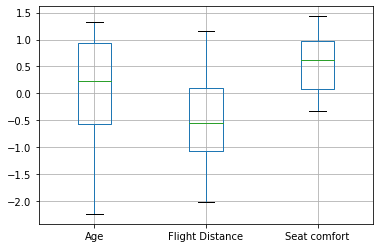

In [ ]:
 np.random.seed(1234)
 df = pd.DataFrame(np.random.randn(10, 3),
                   columns=['Age', 'Flight Distance', 'Seat comfort'])

 boxplot = df.boxplot(column=['Age', 'Flight Distance', 'Seat comfort'])

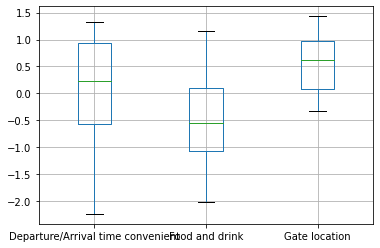

In [ ]:
 np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10, 3),
                  columns=['Departure/Arrival time convenient', 'Food and drink', 'Gate location'])

boxplot = df.boxplot(column=['Departure/Arrival time convenient', 'Food and drink', 'Gate location'])

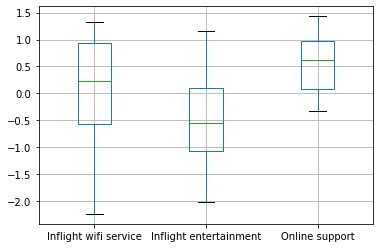

In [ ]:
 np.random.seed(1234)
 df = pd.DataFrame(np.random.randn(10, 3),
                   columns=['Inflight wifi service', 'Inflight entertainment', 'Online support'])

 boxplot = df.boxplot(column=['Inflight wifi service', 'Inflight entertainment', 'Online support'])

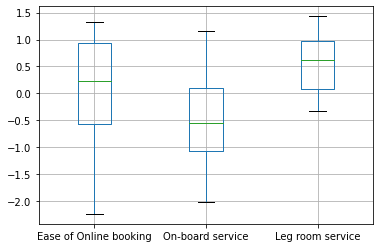

In [ ]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10, 3),
                   columns=['Ease of Online booking', 'On-board service', 'Leg room service'])

boxplot = df.boxplot(column=['Ease of Online booking', 'On-board service', 'Leg room service'])

In [ ]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10, 3),
                  columns=['Baggage handling', 'Checkin service', 'Cleanliness'])

boxplot = df.boxplot(column=['Baggage handling', 'Checkin service', 'Cleanliness'])

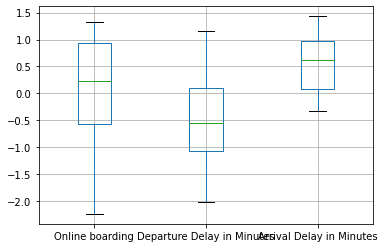

In [ ]:
 np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10, 3),
                 columns=['Online boarding','Departure Delay in Minutes', 'Arrival Delay in Minutes'])

boxplot = df.boxplot(column=['Online boarding','Departure Delay in Minutes', 'Arrival Delay in Minutes'])

## **Transformação de Dados**

In [ ]:
df = df.drop('id', axis=1)
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
nominal_to_num = {"satisfaction_v2": {"satisfied": 1, "neutral or dissatisfied": 0},
                "Gender": {"Female": 1, "Male": 0},
                "Customer Type": {"Loyal Customer": 1, "disloyal Customer": 0},
                "Type of Travel": {"Business travel": 1, "Personal Travel": 0},
                "Class": {"Business": 1, "Eco": 2, "Eco Plus": 3}}

In [ ]:
df_transformacao = df.replace(nominal_to_num)
df_transformacao.head()

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,1,60,1,1,3453,5,5,5,5,5,4,5,3,3,3,3,3,3,3,3,0.0
1,1,1,1,60,1,1,2761,3,3,3,3,3,4,4,5,5,5,5,4,5,3,1,0.0
2,0,0,1,29,0,2,1374,2,4,2,1,3,2,3,3,5,5,5,3,5,3,0,0.0
3,0,0,1,39,0,2,2108,3,4,3,3,5,3,5,5,5,3,5,5,4,5,0,0.0
4,1,1,1,40,1,1,2606,1,1,1,1,3,4,4,5,5,5,5,3,5,5,11,0.0


In [ ]:
df_transformacao.shape

(14709, 23)

## **Redução de Instâncias**

## **Seleção de Atributos - Correlação de Pearson**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df_corr = df_transformacao.corr(method ='pearson')
df_corr

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction_v2,1.000000,0.210815,0.291590,0.107200,0.111811,-0.287277,-0.039389,0.242357,-0.015980,0.121287,-0.009796,0.226262,0.527732,0.392983,0.422915,0.352357,0.295527,0.257038,0.274972,0.254400,0.339034,-0.079004,-0.085016
Gender,0.210815,1.000000,-0.028211,-0.015486,0.007743,0.014446,-0.119229,0.072283,-0.048439,0.057898,0.016738,0.024513,0.134444,0.085396,0.071735,0.050789,0.067858,0.015687,0.021252,0.014368,0.035103,-0.000798,0.000930
Customer Type,0.291590,-0.028211,1.000000,0.284860,-0.316024,-0.045395,-0.011378,0.044962,0.195410,0.051538,0.003548,0.067692,0.238521,0.173413,0.136216,0.075503,0.091397,-0.012258,0.044562,-0.004044,0.097299,-0.011824,-0.006282
Age,0.107200,-0.015486,0.284860,1.000000,0.039407,-0.115848,-0.243844,0.001621,0.031825,0.004034,-0.009256,0.016361,0.126517,0.110192,0.056183,0.060035,0.075664,-0.023637,0.045886,-0.036067,0.034005,-0.015434,-0.017037
Type of Travel,0.111811,0.007743,-0.316024,0.039407,1.000000,-0.477979,0.119877,-0.012264,-0.198688,0.035890,0.007913,0.029185,0.087420,0.047649,0.030901,-0.024355,-0.016886,-0.037614,-0.052881,-0.058348,0.018260,0.008012,0.009319
Class,-0.287277,0.014446,-0.045395,-0.115848,-0.477979,1.000000,-0.157016,0.040087,0.056297,-0.042090,0.002350,-0.062966,-0.225601,-0.161623,-0.120638,-0.179281,-0.116547,-0.138275,-0.142418,-0.124570,-0.099804,0.013274,0.022222
Flight Distance,-0.039389,-0.119229,-0.011378,-0.243844,0.119877,-0.157016,1.000000,-0.041220,0.003193,0.005023,0.002481,0.003722,-0.029069,-0.035685,-0.018041,-0.023136,-0.029494,0.029640,0.000490,0.022545,0.010082,0.110226,0.108483
Seat comfort,0.242357,0.072283,0.044962,0.001621,-0.012264,0.040087,-0.041220,1.000000,0.428603,0.707845,0.410865,0.123208,0.436007,0.128244,0.205705,0.116530,0.140038,0.112923,0.044449,0.096369,0.132491,-0.021326,-0.019024
Departure/Arrival time convenient,-0.015980,-0.048439,0.195410,0.031825,-0.198688,0.056297,0.003193,0.428603,1.000000,0.521542,0.539837,-0.016247,0.079870,-0.008501,-0.012890,0.058260,0.024275,0.060993,0.055159,0.064328,-0.006411,0.021104,0.018150
Food and drink,0.121287,0.057898,0.051538,0.004034,0.035890,-0.042090,0.005023,0.707845,0.521542,1.000000,0.529540,0.018759,0.370378,0.025770,0.030483,0.045712,0.082276,0.038276,0.005230,0.028154,0.011567,-0.001950,-0.001444


<Figure size 864x1440 with 0 Axes>

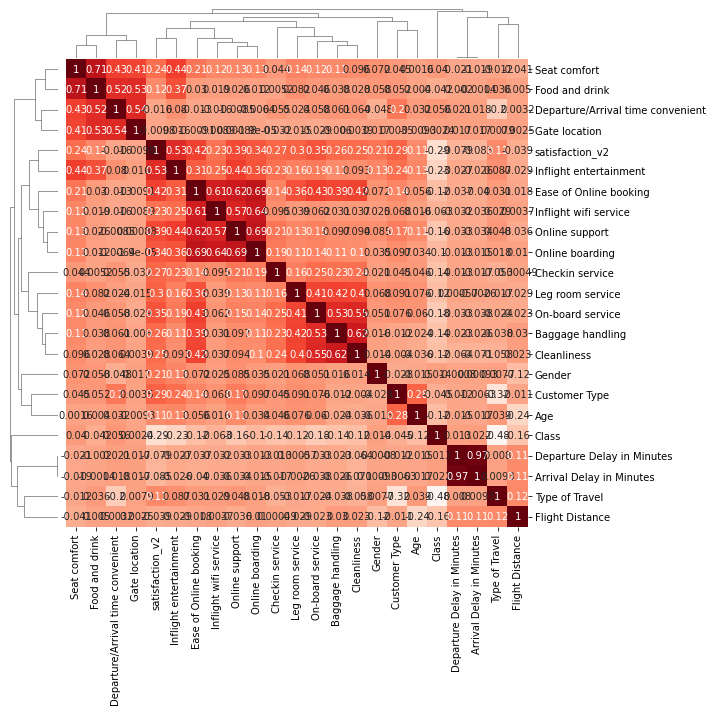

In [ ]:
plt.figure(figsize=(12,20))
sns.clustermap(df_corr, annot=True, cmap="Reds", 
               cbar_pos=None, dendrogram_ratio=0.1, fmt='.2g')
plt.show()

In [ ]:
# as 5 features que tem melhores correlações com o target são: 
# Inflight entertainment (0.523364)
# Ease of Online booking	(0.432017)
# Online support	(0.389890)
# On-board service (0.352283)
# Online boarding	(0.338118)

df_pearson = df[['Inflight entertainment', 'Ease of Online booking', 'Online support', 'On-board service', 'Online boarding', 'satisfaction_v2']]
df_pearson.head()

,Inflight entertainment,Ease of Online booking,Online support,On-board service,Online boarding,satisfaction_v2
0,4,3,5,3,3,satisfied
1,4,5,4,5,3,satisfied
2,2,3,3,5,3,neutral or dissatisfied
3,3,5,5,5,5,neutral or dissatisfied
4,4,5,4,5,5,satisfied


In [ ]:
num_to_nominal = {"satisfaction_v2": {1: "satisfied", 0: "neutral or dissatisfied"}}
df_pearson = df_pearson.replace(num_to_nominal)
df_pearson.head()

,Inflight entertainment,Ease of Online booking,Online support,On-board service,Online boarding,satisfaction_v2
0,4,3,5,3,3,satisfied
1,4,5,4,5,3,satisfied
2,2,3,3,5,3,neutral or dissatisfied
3,3,5,5,5,5,neutral or dissatisfied
4,4,5,4,5,5,satisfied


In [ ]:
df_pearson.shape

(14709, 6)

In [ ]:
df_pearson.to_csv('BaseReduzida2.csv', sep=',', index=False) 

## **Extração de Atributos - PCA**

In [ ]:
features = ['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

x = df_transformacao.loc[:, features].values
y = df_transformacao.loc[:,['satisfaction_v2']].values
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=3)
componentes = pca.fit_transform(x)

In [ ]:
PCAdf = pd.DataFrame(data = componentes, 
                     columns = ['componente 1', 'componente 2','componente 3'])

PCAdf.head()

,componente 1,componente 2,componente 3
0,-1.242236,-2.611036,1.648796
1,-2.317433,0.490719,-1.556811
2,-0.075436,1.022683,-2.431732
3,-2.471238,0.329657,0.083808
4,-1.860251,3.257834,-1.006860


In [ ]:
target = df_transformacao['satisfaction_v2']

In [ ]:
finaldf_PCA = pd.concat([PCAdf, target], axis = 1)
finaldf_PCA.head()

,componente 1,componente 2,componente 3,satisfaction_v2
0,-1.242236,-2.611036,1.648796,1.0
1,-2.317433,0.490719,-1.556811,1.0
2,-0.075436,1.022683,-2.431732,0.0
3,-2.471238,0.329657,0.083808,0.0
4,-1.860251,3.257834,-1.006860,1.0


In [ ]:
num_to_nominal = {"satisfaction_v2": {1: "satisfied", 0: "neutral or dissatisfied"}}
finaldf_PCA = finaldf_PCA.replace(num_to_nominal)
finaldf_PCA.head()

,componente 1,componente 2,componente 3,satisfaction_v2
0,-1.242236,-2.611036,1.648796,satisfied
1,-2.317433,0.490719,-1.556811,satisfied
2,-0.075436,1.022683,-2.431732,neutral or dissatisfied
3,-2.471238,0.329657,0.083808,neutral or dissatisfied
4,-1.860251,3.257834,-1.006860,satisfied


In [ ]:
finaldf_PCA.shape

(14752, 4)

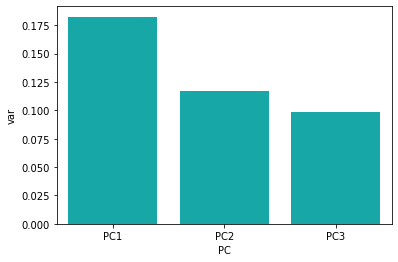

In [ ]:
import seaborn as sns

df_plot = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="var", 
           data=df_plot, color="c");

In [ ]:
finaldf_PCA.to_csv('BaseReduzida3.csv', sep=',', index=False) 